In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, time

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df_oct = pd.read_csv("data/vumonic_india_food_delivery_20231001_20231031.csv", low_memory=False)
df_nov = pd.read_csv("data/vumonic_india_food_delivery_20231101_20231130.csv", low_memory=False)

# with open('data/vumonic_india_food_delivery_20231201_20231231.csv', 'r') as f:
#     first_line = f.readline()
# columns = first_line.replace('\n', '').split(',')
columns = df_nov.columns

df_dec = pd.read_csv('data/vumonic_india_food_delivery_20231201_20231231.csv', usecols=columns, encoding='latin-1', low_memory=False)

df = pd.concat([df_dec, df_nov, df_oct], ignore_index=True)
drop_columns = ['mid', 'year', 'order_promotion_discount', 
                'order_coupon_discount', 'order_seller_discount', 'order_delivery_discount',
                'order_status', 'order_delivery_discount', 'delivery_address_postal_code', 'order_payment_currency',
                'restaurant_address_postal_code', 'user_dob', 'user_address_postal_code', 'user_address_country']
df =  df.drop(drop_columns, axis=1)
df = df[df['user_age'] != 'male']

In [3]:
df

,transaction_id,company,sender_id,email_timestamp,month,day,product_name,product_price,product_quantity,product_total,order_subtotal,order_convenience_fee,order_packaging_fee,order_delivery_fee,order_tip,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid,order_discount_code,premium_membership,premium_membership_type,free_delivery,order_payment_type,delivery_address_city,delivery_address_state,restaurant_name,restaurant_address_city,restaurant_address_state,user_id,user_gender,user_age,user_address_city,user_address_state,user_device_brand,user_device_model,user_os_type,user_onboard_at,user_inactive_at
0,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01T00:08:24+00:00,12,1,Classic Chicken Roll,216.0,1.0,216.0,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,NaN,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN
1,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01T00:08:24+00:00,12,1,Multigrain Laccha Paratha Roll,NaN,NaN,NaN,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,Free,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN
2,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,1,Double Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
3,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,1,Crispy Potato Burger,89.0,1.0,89.0,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,NaN,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
4,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,1,Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741079,9838db546bd880398bae5e8de6a68c3b,swiggy,noreply@swiggy.in,2023-10-26T19:23:37+00:00,10,26,Egg Curry 3 Eggs,200.0,1.0,200.0,330.0,3.0,20.0,9.0,NaN,13.35,NaN,124.99,NaN,250.0,SUPERSAVER,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741080,abfb444e117e7958b0b618ddcae44e39,swiggy,noreply@swiggy.in,2023-10-29T10:37:05+00:00,10,29,Chicken Fry Piece Biryani Half,250.0,1.0,250.0,250.0,3.0,NaN,9.0,NaN,8.35,NaN,125.00,NaN,145.0,SWIGGYWEEKENDS,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741081,084f0df866d7928acf1c8f332184dec9,swiggy,noreply@swiggy.in,2023-10-30T09:30:29+00:00,10,30,Chicken Fry Biryani,320.0,1.0,320.0,320.0,3.0,12.0,9.0,NaN,14.64,NaN,50.00,NaN,309.0,SWIGGYIT,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Royal Family Restaurant,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741082,ad320c16a2e04078f50af1416107bda2,swiggy,noreply@swiggy.in,2023-10-05T06:57:56+00:00,10,5,Veg Delight Pizza,109.0,3.0,327.0,327.0,NaN,NaN

In [4]:
df.email_timestamp = pd.to_datetime(df.email_timestamp).dt.tz_convert('Asia/Kolkata')
df['hour'] = df['email_timestamp'].dt.hour
df['minute'] = df['email_timestamp'].dt.minute
df

,transaction_id,company,sender_id,email_timestamp,month,day,product_name,product_price,product_quantity,product_total,order_subtotal,order_convenience_fee,order_packaging_fee,order_delivery_fee,order_tip,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid,order_discount_code,premium_membership,premium_membership_type,free_delivery,order_payment_type,delivery_address_city,delivery_address_state,restaurant_name,restaurant_address_city,restaurant_address_state,user_id,user_gender,user_age,user_address_city,user_address_state,user_device_brand,user_device_model,user_os_type,user_onboard_at,user_inactive_at,hour,minute
0,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01 05:38:24+05:30,12,1,Classic Chicken Roll,216.0,1.0,216.0,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,NaN,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN,5,38
1,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01 05:38:24+05:30,12,1,Multigrain Laccha Paratha Roll,NaN,NaN,NaN,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,Free,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN,5,38
2,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01 05:40:41+05:30,12,1,Double Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN,5,40
3,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01 05:40:41+05:30,12,1,Crispy Potato Burger,89.0,1.0,89.0,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,NaN,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN,5,40
4,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01 05:40:41+05:30,12,1,Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741079,9838db546bd880398bae5e8de6a68c3b,swiggy,noreply@swiggy.in,2023-10-27 00:53:37+05:30,10,26,Egg Curry 3 Eggs,200.0,1.0,200.0,330.0,3.0,20.0,9.0,NaN,13.35,NaN,124.99,NaN,250.0,SUPERSAVER,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN,0,53
741080,abfb444e117e7958b0b618ddcae44e39,swiggy,noreply@swiggy.in,2023-10-29 16:07:05+05:30,10,29,Chicken Fry Piece Biryani Half,250.0,1.0,250.0,250.0,3.0,NaN,9.0,NaN,8.35,NaN,125.00,NaN,145.0,SWIGGYWEEKENDS,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN,16,7
741081,084f0df866d7928acf1c8f332184dec9,swiggy,noreply@swiggy.in,2023-10-30 15:00:29+05:30,10,30,Chicken Fry Biryani,320.0,1.0,320.0,320.0,3.0,12.0,9.0,NaN,14.64,NaN,50.00,NaN,309.0,SWIGGYIT,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Royal Family Restaurant,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN,15,0
741082,ad320c16a2e04078f50af1416107bda2,swiggy,noreply@swiggy.in,2023-10-05 12:27:5

In [5]:
def mode_safe(x):
    modes = x.mode()
    return modes.iat[0] if len(modes) > 0 else None

In [32]:
company = "zomato"

In [38]:
dft31 = df[(df.day == 31) & (df.month == 12)][['company', 'transaction_id', 'hour', 'order_amount_paid']].groupby(['company', 'transaction_id']).agg({'hour': mode_safe, 'order_amount_paid': mode_safe}).reset_index().groupby(['company', 'hour']).sum().reset_index()["order_amount_paid"]

In [39]:
dft = df[(df.day != 31) | (df.month != 12)][['company', 'transaction_id', 'hour', 'order_amount_paid']].groupby(['company', 'transaction_id']).agg({'hour': mode_safe, 'order_amount_paid': mode_safe}).reset_index().groupby(['company', 'hour']).sum().apply(lambda x: x/ 91).reset_index()
dft.hour = [time(hour) for hour in dft.hour]
dft = dft.rename(columns={'order_amount_paid': 'sales'})
dft["sales31/12"] = dft31
dft['hour_str'] = dft['hour'].apply(lambda x: x.strftime('%H'))
dft

,company,hour,sales,sales31/12,hour_str
0,swiggy,00:00:00,47301.956044,81366.00,00
1,swiggy,01:00:00,41305.615385,97914.00,01
2,swiggy,02:00:00,29177.296703,108641.00,02
3,swiggy,03:00:00,12852.703297,115669.00,03
4,swiggy,04:00:00,4991.736264,107520.00,04
5,swiggy,05:00:00,2125.527473,16385.00,05
6,swiggy,06:00:00,785.109890,450.00,06
7,swiggy,07:00:00,1409.395604,367.00,07
8,swiggy,08:00:00,4490.329670,7774.00,08
9,swiggy,09:00:00,7322.274725,9240.00,09


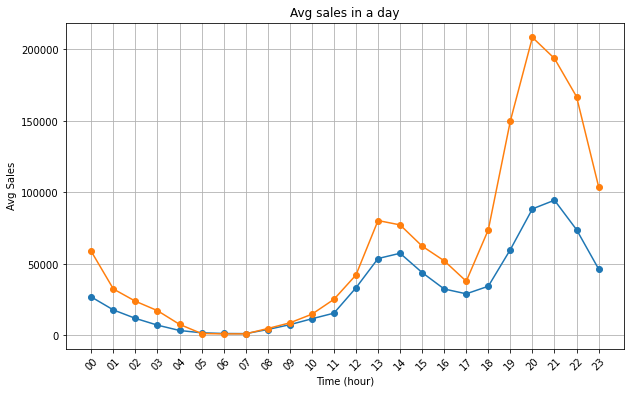

In [35]:
# Create a time series plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(dft["hour_str"], dft["sales"], marker='o')
plt.plot(dft["hour_str"], dft["sales31/12"], marker='o')

# Set plot labels and title
plt.xlabel('Time (hour)')
plt.ylabel('Avg Sales')
plt.title('Avg sales in a day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display grid
plt.grid(True)

# Show plot
plt.show()

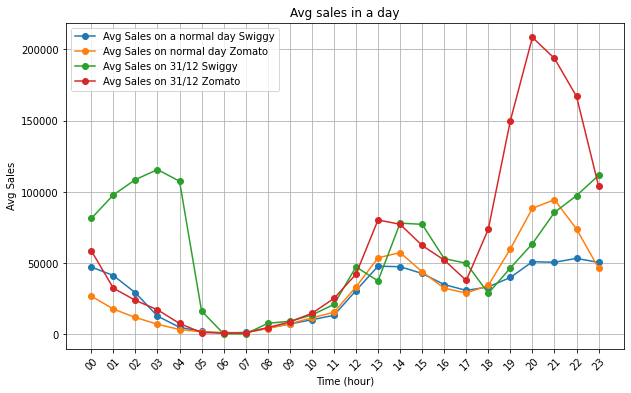

In [40]:
# Create a time series plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(dft[dft.company == "swiggy"]["hour_str"], dft[dft.company == "swiggy"]["sales"], marker='o', label='Avg Sales on a normal day Swiggy')
plt.plot(dft[dft.company == "zomato"]["hour_str"], dft[dft.company == "zomato"]["sales"], marker='o', label='Avg Sales on normal day Zomato')

plt.plot(dft[dft.company == "swiggy"]["hour_str"], dft[dft.company == "swiggy"]["sales31/12"], marker='o', label='Avg Sales on 31/12 Swiggy')
plt.plot(dft[dft.company == "zomato"]["hour_str"], dft[dft.company == "zomato"]["sales31/12"], marker='o', label='Avg Sales on 31/12 Zomato')

# Set plot labels and title
plt.xlabel('Time (hour)')
plt.ylabel('Avg Sales')
plt.title('Avg sales in a day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display grid
plt.grid(True)

# Show legend
plt.legend()

# Show plot
plt.show()


<AxesSubplot:xlabel='hour'>

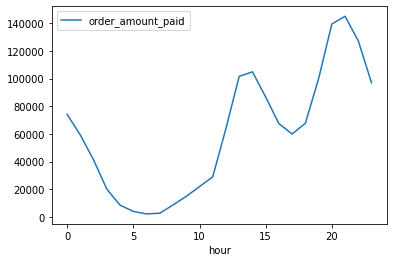

In [10]:
df[(df.day != 31) | (df.month != 12)][['transaction_id', 'hour', 'order_amount_paid']].groupby(['transaction_id']).agg({'hour': mode_safe, 'order_amount_paid': mode_safe}).reset_index().groupby('hour').sum().apply(lambda x: x/ 91).plot()

In [11]:
df[(df.day != 31) | (df.month != 12)][['transaction_id', 'email_timestamp', 'order_amount_paid']].groupby(['transaction_id', 'email_timestamp']).agg({'order_amount_paid': mode_safe}).reset_index().groupby('email_timestamp').mean()

,order_amount_paid
email_timestamp,
2023-10-01 05:30:05+05:30,331.00
2023-10-01 05:47:05+05:30,187.00
2023-10-01 05:47:30+05:30,600.55
2023-10-01 05:58:05+05:30,235.36
2023-10-01 06:00:25+05:30,150.00
...,...
2023-12-31 05:04:03+05:30,577.89
2023-12-31 05:05:29+05:30,334.29
2023-12-31 05:11:27+05:30,290.39


<AxesSubplot:xlabel='email_timestamp'>

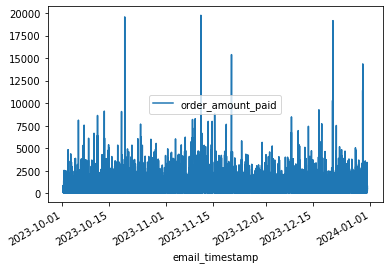

In [12]:
df[(df.day != 31) | (df.month != 12)][['transaction_id', 'email_timestamp', 'order_amount_paid']].groupby(['transaction_id', 'email_timestamp']).agg({'order_amount_paid': mode_safe}).reset_index().groupby('email_timestamp').mean().plot()

In [13]:
df[(df.day != 31) | (df.month != 12)][['transaction_id', 'hour', 'order_amount_paid']].groupby(['transaction_id']).agg({'hour': mode_safe, 'order_amount_paid': mode_safe})

,hour,order_amount_paid
transaction_id,,
00000969eb5519ab3010045afd4f2c7e,14,167.00
00003ecfb1e5d656c3f63faa0e924cfc,2,530.74
000046111ab1eb6d9d0a7959808d8ca9,23,527.04
00004820f35189820fa2c283aca5ec07,13,633.74
00004846d2c865652aba6f114debce7b,18,246.74
...,...,...
ffffbdba28691b459ab05d1bfb280cba,13,577.00
ffffc8fe71968589b00f708cba2a2908,19,224.00
ffffdef9f85107df8a43a75066103463,19,132.00


In [21]:
df[(df.day != 31) | (df.month != 12)][df.company == "swiggy"][['free_delivery']].value_counts(dropna=False)["Free"] * 100 / len(df[(df.day != 31) | (df.month != 12)][df.company == "swiggy"][['free_delivery']])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


16.958022953043063

In [22]:
df[(df.day == 31) & (df.month == 12)][df.company == "swiggy"][['free_delivery']].value_counts(dropna=False)["Free"] * 100 / len(df[(df.day == 31) & (df.month == 12)][df.company == "swiggy"][['free_delivery']])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


16.12719235705119

In [41]:
df[(df.day != 31) | (df.month != 12)][df.company == "zomato"][['free_delivery']].value_counts(dropna=False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


free_delivery
NaN              341772
dtype: int64

In [46]:
bb = dft[dft.hour_str.isin([str(i) for i in range(18, 23)])].groupby('company').sum()
bb['sales_percentage'] = (bb['sales'] / bb['sales'].sum()) * 100
bb['sales31/12_percentage'] = (bb['sales31/12'] / bb['sales31/12'].sum()) * 100

bb

,sales,sales31/12,sales_percentage,sales31/12_percentage
company,,,,
swiggy,228284.318681,322156.00,39.383819,28.889883
zomato,351355.550000,792961.01,60.616181,71.110117


In [47]:
(792961-351355)/351355

1.2568655633191501